<a href="https://colab.research.google.com/github/atomiceltaweel/CV/blob/main/xgboost_customer_churn_bootcamp_student22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Data Science with Amazon SageMaker
_**Using Amazon SageMaker to solve an end-to-end machine learning problem**_

---

Learn to use Amazon SageMaker for creating, tuning, and deploying a machine learning (ML) model for predicting customer churn of a moblile phone service provider.

## Modules

1. [Prepare a dataset for training](#Prepare-a-dataset-for-training)
2. [Train and evaluate a model](#Train-and-evaluate-a-model)
3. [Automatically tune the model](#Automatically-tune-the-model)
4. [Make the model production ready](#Make-the-model-production-ready)
5. [AWS Auto Scaling](#AWS-Auto-Scaling)
6. [Relative cost of errors](#Relative-cost-of-errors)
  
---

## Prepare a dataset for training

### Churn prediction problem

Losing customers is costly for any business.  Identifying unhappy customers early gives you a chance to offer them incentives to stay.  You will use ML to automate the identification of unhappy customers, also known as *customer churn prediction*. 

ML models rarely give perfect predictions, so you will learn how to adjust for prediction mistakes in your total ML costs.

The example of churn that may be familiar to you; leaving a mobile phone service provider for a competitor.  If a provider is aware that a particular customer is considering leaving, it can offer timely incentives, perhaps in the form of a phone upgrade, to encourage the customer to continue service.  

Incentives are often more cost-effective than losing and reacquiring a customer.

### Dataset

Mobile phone service providers keep historical records on customers who churn bit ultimately continue using the service. You can use this data to construct an ML model of one mobile phone provider's churn using a process called *training*. 

You'll train the model, can pass the profile information of an arbitrary customer to the model, and have the model predict whether this customer is going to churn. The model will make mistakes&mdash;predicting the future is tricky. However, you will learn how to manage prediction errors.

The dataset used is publicly available and is mentioned in the book [*Discovering Knowledge in Data*](https://www.amazon.com/dp/0470908742/) by Daniel T. Larose. The author attributed the dataset to the University of California Irvine Repository of Machine Learning Datasets.

As part of the lab setup, the relevant dataset, churn.txt has been downloaded and made available for this exercise.

In [ ]:
!head './churn.txt'

The above looks like a CSV file with a header row. 

You will use the pandas library for loading and displaying this raw dataset. 

The resulting `churn` variable is a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [ ]:
import pandas as pd
churn = pd.read_csv('./churn.txt')
churn

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


Let's take a closer look. By modern standards, it’s a relatively small dataset with only 3,333 records. 

Each record uses 21 attributes to describe the profile of a customer of an unknown US mobile phone service provider. 

The attributes are:

- `State`: The US state in which the customer resides indicated by a two-letter abbreviation. For example, OH or NJ
- `Account Length`: The number of days that this account has been active
- `Area Code`: The three-digit area code of the corresponding customer’s phone number
- `Phone`: The seven-digit phone number
- `Int’l Plan`: Whether the customer has an international calling plan: yes/no
- `VMail Plan`: Whether the customer has a voice mail feature: yes/no
- `VMail Message`: The average number of voice mail messages per month
- `Day Mins`: The total number of calling minutes used during the day
- `Day Calls`: The total number of calls placed during the day
- `Day Charge`: The billed cost of daytime calls
- `Eve Mins, Eve Calls, Eve Charge`: The billed cost for calls placed during the evening
- `Night Mins`, `Night Calls`, `Night Charge`: The billed cost for calls placed during nighttime
- `Intl Mins`, `Intl Calls`, `Intl Charge`: The billed cost for international calls
- `CustServ Calls`: The number of calls placed to Customer Service
- `Churn?`: Whether the customer left the service: true/false

The last attribute, `Churn?`, is known as the *target attribute*&mdash;the attribute that we want the ML model to predict.  Because the target attribute is binary, our model will be performing binary prediction, also known as *binary classification*.

Now, you will explore and visualize the data and the relationships between attributes.

We've already used pandas.  We also recommend using the numpy and/or matplotlib libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The first step is to use a histogram to see how the values of individual attributes are distributed, as well as compute summary statistics for numeric attributes such as mean, min values, max values, standard deviations, etc. 

For categorical variables we need to see frequency tables. 

While there are several ways to do this in Python&mdash;we are going to use the following pandas functions:[`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html#pandas.DataFrame.hist),[`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe),[`crosstab()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html), and[`select_dtypes()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html). 

To show the histograms right in the Jupyter notebook, we will also use the[`%matplotlib inline`](https://ipython.readthedocs.io/en/stable/interactive/plotting.html) magic function of IPython.

col_0,% observations
State,
AK,0.015602
AL,0.024002
AR,0.016502
AZ,0.019202
CA,0.010201
CO,0.019802
CT,0.022202
DC,0.016202
DE,0.018302


# of unique values 51


col_0,% observations
Phone,
327-1058,0.0003
327-1319,0.0003
327-3053,0.0003
327-3587,0.0003
327-3850,0.0003
...,...
422-7728,0.0003
422-8268,0.0003
422-8333,0.0003


# of unique values 3333


col_0,% observations
Int'l Plan,
no,0.90309
yes,0.09691


# of unique values 2


col_0,% observations
VMail Plan,
no,0.723372
yes,0.276628


# of unique values 2


col_0,% observations
Churn?,
False.,0.855086
True.,0.144914


# of unique values 2


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


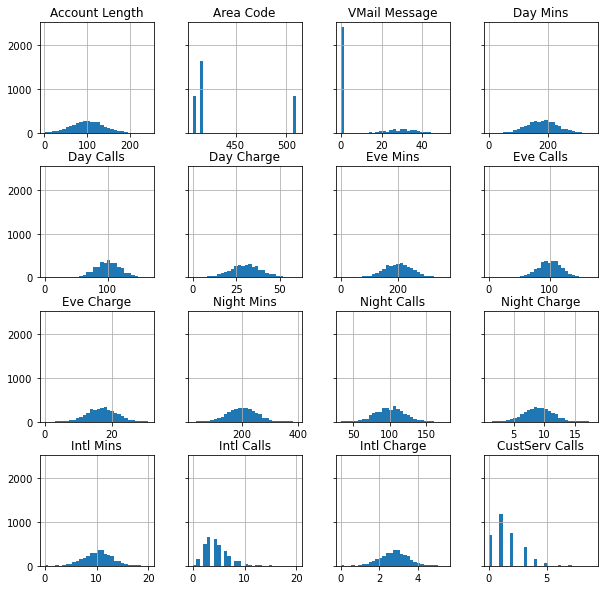

In [ ]:
# show frequency tables for each categorical feature and counts of unique values
for column in churn.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=churn[column],
                        columns='% observations', 
                        normalize='columns'))
    print("# of unique values {}".format(churn[column].nunique()))

# show summary statistics
display(churn.describe())

# build histograms for each numeric feature
%matplotlib inline
hist = churn.hist(bins=30, sharey=True, figsize=(10, 10))

We can see immediately that:
* `State` appears to be quite evenly distributed
* `Phone` takes on too many unique values to be of any practical use.  It's possible that parsing out the prefix could have some value, but unless you have more context on how these are allocated, avoid using it.
* Only 14% of customers churned, so there is some class imabalance, but nothing extreme.
* Most of the numeric features are surprisingly well distributed, with many showing bell-like gaussianity.  `VMail Message` being a notable exception (and `Area Code` showing up as a feature we should convert to non-numeric).

### Exercise 1

Now that we've shown how to do the first part of the exercise, it's time for you to complete the second part by looking at how each feature relates to our target variable `Churn?`. 

You can accomplish this using the same pandas functions of `crosstab()`and`hist()`by entering the code in the cell below.


Churn?,False.,True.
State,,
AK,0.017193,0.006211
AL,0.025263,0.016563
AR,0.015439,0.022774
AZ,0.021053,0.008282
CA,0.008772,0.018634
CO,0.020000,0.018634
CT,0.021754,0.024845
DC,0.017193,0.010352
DE,0.018246,0.018634


Churn?,False.,True.
Phone,,
327-1058,0.000351,0.00000
327-1319,0.000351,0.00000
327-3053,0.000351,0.00000
327-3587,0.000000,0.00207
327-3850,0.000351,0.00000
...,...,...
422-7728,0.000351,0.00000
422-8268,0.000351,0.00000
422-8333,0.000351,0.00000


Churn?,False.,True.
Int'l Plan,,
no,0.934737,0.716356
yes,0.065263,0.283644


Churn?,False.,True.
VMail Plan,,
no,0.704561,0.834369
yes,0.295439,0.165631


Account Length


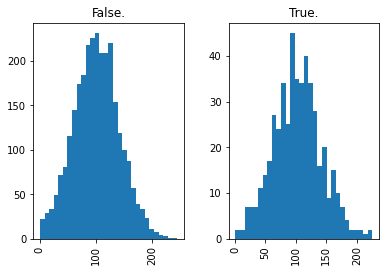

Area Code


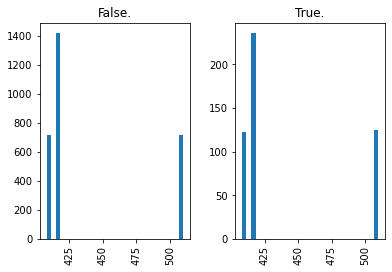

VMail Message


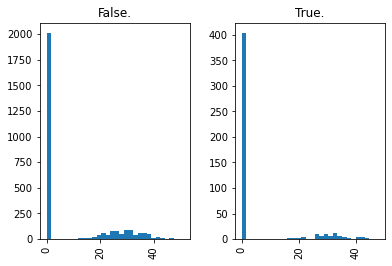

Day Mins


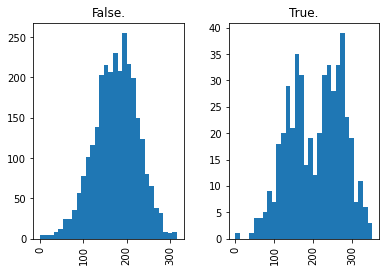

Day Calls


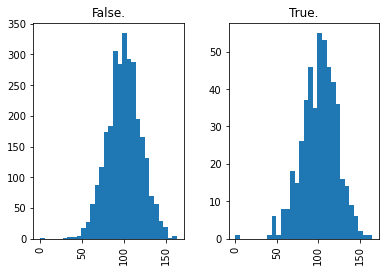

Day Charge


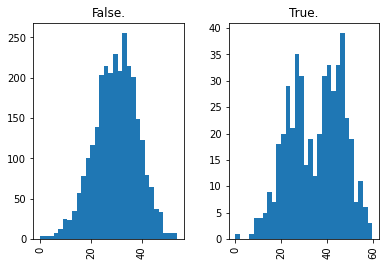

Eve Mins


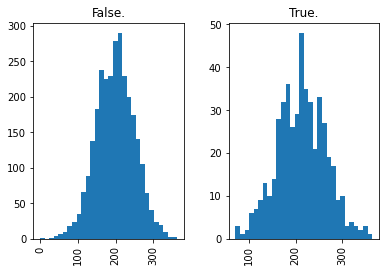

Eve Calls


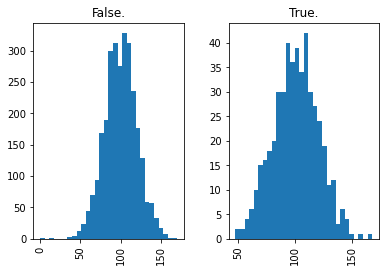

Eve Charge


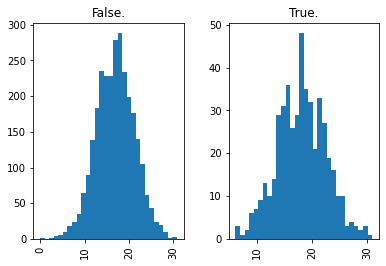

Night Mins


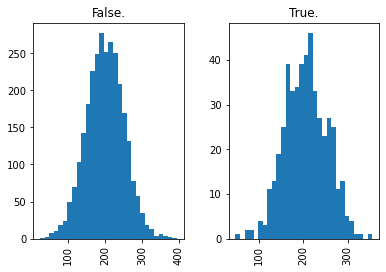

Night Calls


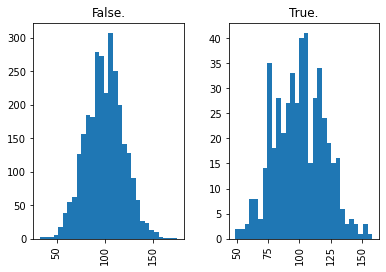

Night Charge


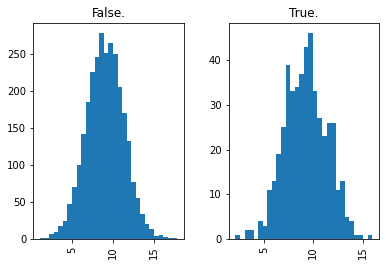

Intl Mins


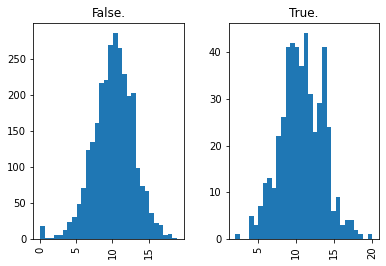

Intl Calls


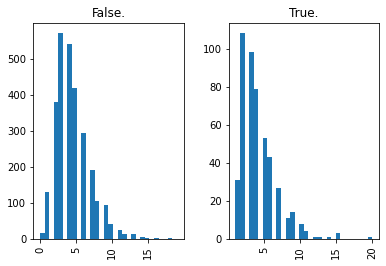

Intl Charge


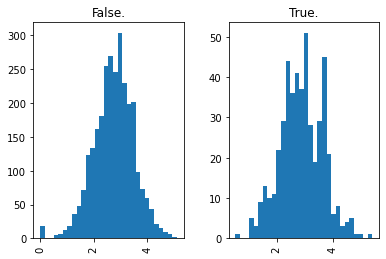

CustServ Calls


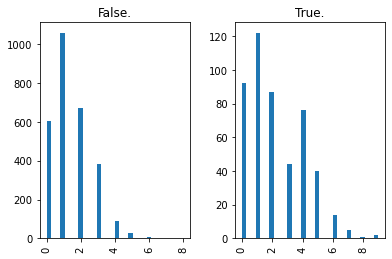

In [ ]:
for column in churn.select_dtypes(include=['object']).columns:
    if column != 'Churn?':
        display(pd.crosstab(
            index=churn[column], columns=churn['Churn?'], normalize='columns'))

for column in churn.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = churn[[column, 'Churn?']].hist(by='Churn?', bins=30)
    plt.show()

Depending on your analysis, your solution might show different results, but you should see that churners appear:
* Fairly evenly distributed geographically
* More likely to have an international plan
* Less likely to have a voicemail plan
* Exhibit some bimodality in daily minutes (either higher or lower than the average for non-churners)
* Larger number of customer service calls (which makes sense as we'd expect customers who experience lots of problems may be more likely to churn)

In addition, we see that churners take on very similar distributions for features like`Day Mins`and`Day Charge`.  

That's not surprising; you would expect minutes spent talking to correlate with charges.

### Exercise 2

Examine the pairwise relationships between attributes to see how they are correlated. Use the pandas functions [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) and [scatter_matrix()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html) pandas functions to achieve this. 

Enter your solution in the cell below. 

<AxesSubplot:>

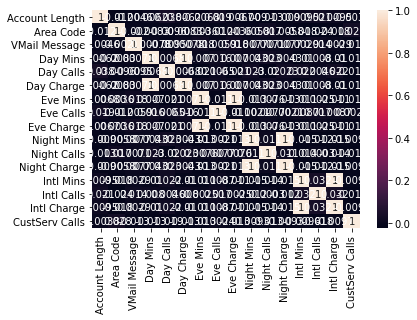

In [ ]:

import seaborn as sns
correlation_matrix = churn.corr()
sns.heatmap(data=correlation_matrix, annot=True)


You should see several features that essentially have 100 percent correlation with one another.  Including these feature pairs in some machine learning algorithms can create catastrophic problems, while in others it will only introduce minor redundancy and bias.

In preparation for model training, first remove the columns that observed as useless for our purposes. 

Remove the`Phone`and`Area Code`attributes:

In [ ]:
churn = churn.drop(['Phone', 'Area Code'], axis=1)

Next, remove one feature from each of the highly correlated pairs: 

* `Day Charge` from the pair with `Day Mins`
* `Eve Charge` from the pair with `Eve Mins`
* `Night Charge` from the pair with `Night Mins`
* `Intl Charge` from the pair with `Intl Mins`

In [ ]:
churn = churn.drop(['Day Charge', 'Eve Charge',
                    'Night Charge', 'Intl Charge'], axis=1)

Now that we have done all of the changes to the data, let's have a last look into how the data looks like before moving to training. 

In [ ]:
churn.head()

,State,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,KS,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,OH,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
2,NJ,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
3,OH,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
4,OK,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.


## Train and evaluate a model

Now, determine which algorithm to use.  As mentioned above, there appear to be some variables where both high and low (but not intermediate) values are predictive of churn.  In order to accommodate this in an algorithm like linear regression, we'd need to generate polynomial (or *bucketed*) terms.  

Instead, let's attempt to model this problem using gradient boosted trees.  

Amazon SageMaker provides an XGBoost container that we can use to train in a managed, distributed setting, and then host as a real-time prediction endpoint.  XGBoost uses gradient boosted trees that naturally account for non-linear relationships between features and the target variable, as well as accommodating complex interactions between features.

Amazon SageMaker XGBoost can train on data in either a CSV or LibSVM format.  For this example, we'll stick with CSV.  It should:
* Have the predictor variable in the first column
* Not have a header row

First, convert the categorical features into numeric features.

In [ ]:
model_data = pd.get_dummies(churn)
model_data = pd.concat([model_data['Churn?_True.'], model_data.drop(
    ['Churn?_False.', 'Churn?_True.'], axis=1)], axis=1)

Now split the data into training, validation, and test sets.  This will help prevent overfitting the model and allow you to test the model's accuracy on data it hasn't already seen.

In [ ]:
train_data, validation_data, test_data = np.split(model_data.sample(
    frac=1, random_state=1729), [int(0.7 * len(model_data)), int(0.9 * len(model_data))])
train_data.to_csv('train.csv', header=False, index=False)
validation_data.to_csv('validation.csv', header=False, index=False)

Upload these files to Amazon S3, where SageMaker expects them.

boto is the standard Python library used to invoke AWS API. The same S3 bucket and prefix will be used for training and model data.  

This should be within the same region as the Notebook Instance, training, and hosting.

In [ ]:
import os
import boto3
import sagemaker

sess = sagemaker.Session()

bucket = sess.default_bucket()
prefix = 'bootcamp-xgboost-churn'

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(
    prefix, 'validation/validation.csv')).upload_file('validation.csv')

## Train

Next, specify the locations of the XGBoost algorithm containers.

Amazon SageMaker algorithms are packaged as Docker images. This gives you the flexibility to use almost any algorithm code with Amazon SageMaker, regardless of implementation language, dependent libraries, frameworks, and so on.

In [ ]:
# Set the IAM Role
from sagemaker import get_execution_role

role = get_execution_role()
# Get the XGBoost docker image
from sagemaker import image_uris
container = image_uris.retrieve('xgboost', boto3.Session().region_name, '1.0-1')
display(container)

'246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-xgboost:1.0-1-cpu-py3'

[SageMaker Python SDK](https://sagemaker.readthedocs.io/en/latest/) provides these high-level abstractions for working with Amazon SageMaker:

* Estimators: Encapsulates training on SageMaker.
* Models: Encapsulates built ML models.
* Predictors: Provides real-time inference and transformation using Python data-types against a SageMaker endpoint.
* Session: Provides a collection of methods for working with SageMaker resources.

Start by creating the [xgboost Estimator](https://sagemaker.readthedocs.io/en/latest/estimators.html). The mandatory paramters are: image_name, role, session, instance_type, and instance_count. 

For this training job, use:

* `image_uri = container`
* `role=role`
* `sagemaker_session = sess`
* `instance_count = 1`
* `instance_type = ml.m4.xlarge` 

### Exercise 3

Finish the Estimator definition. 

In [ ]:
# Creating the SageMaker Estimator object
import sagemaker
sess = sagemaker.Session()

xgb = sagemaker.estimator.Estimator(container,
                                    role,
                                    instance_count=1,
                                    instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(
                                        bucket, prefix),
                                    sagemaker_session=sess)

An ML algorithm is configured and tuned based on its hyperparameters, which change the way the algorithm works.

The XGBoost hyperparamaters are described in the [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/parameter.html)

For this example, the required hyperparameters for XGBoost are:

* `objective` - Specifies the learning task and the corresponding learning objective. please use **binary:logistic** for binary classification task.  
* `num_round` - controls the number of rounds. Each round is trained using the output from the previous one. More rounds should produce a better fit on the training data, but can be computationally expensive or lead to overfitting.

A few other key hyperparameters are:

* `max_depth` controls how deep each tree within the algorithm can be built. Deeper trees can lead to better fit, but are more computationally expensive and can lead to overfitting. There is typically some trade-off in model performance that needs to be explored between a large number of shallow trees and a smaller number of deeper trees.
* `subsample` controls sampling of the training data. This technique can help reduce overfitting, but setting it too low can also starve the model of data.
* `eta` controls how aggressive each round of boosting is. Larger values lead to more conservative boosting.
* `gamma` controls how aggressively trees are grown. Larger values lead to more conservative models.

### Exercise 4

Use xgb.set_hyperparameters to set the hyperparameters.

In [ ]:
# Set the hyperparameters
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        num_round=100)

Then, because you're training with the CSV file format, create s3_inputs the training function can use as a pointer to the files in Amazon S3.

In [ ]:
# Configuring the data inputs
s3_input_train = sagemaker.inputs.TrainingInput(
    s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')
s3_input_validation = sagemaker.inputs.TrainingInput(
    s3_data='s3://{}/{}/validation/'.format(bucket, prefix), content_type='csv')

Finally, you are ready to train. 

To train, use the fit() function.

In [ ]:
# Training the model
xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})

2021-12-22 11:18:34 Starting - Starting the training job...
2021-12-22 11:18:58 Starting - Launching requested ML instancesProfilerReport-1640171914: InProgress
......
2021-12-22 11:19:58 Starting - Preparing the instances for training.........
2021-12-22 11:21:27 Downloading - Downloading input data...
2021-12-22 11:21:59 Training - Downloading the training image...
2021-12-22 11:22:31 Uploading - Uploading generated training model.INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[11:22:28] 2333x66 matrix with 153978 entrie

## Host

Now create a model and deploy it to a hosted endpoint using the deploy API of SageMaker [estimator](https://sagemaker.readthedocs.io/en/latest/estimators.html).  

### Exercise 5 
Configure `initial_instance_count = 1` , `instance_type = ml.m4.xlarge`, `serializer = CSVSerializer()`.
You set the csv serializer for passing the`test_data` arrays to the model that will be behind the endpoint.

In [ ]:
# Deploy the model
Variant = 'AllTraffic'  # Configure the default deployment variant

from sagemaker.predictor import CSVSerializer

xgb_predictor = xgb.deploy(initial_instance_count=1,
                           instance_type='ml.m4.xlarge',
                          serializer=CSVSerializer())

-------!

### Evaluate

Now make real-time predictions from your model by making an http POST request.  

Use a simple function to:

1. Loop over your test dataset
2. Split it into mini-batches of rows 
3. Convert those mini-batchs to CSV string payloads
4. Retrieve mini-batch predictions by invoking the XGBoost endpoint
5. Collect predictions and convert from the CSV output your model provides into a NumPy array

In [ ]:
def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join(
            [predictions, xgb_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')


predictions = predict(test_data.to_numpy()[:, 1:])

Assess the performance of your ML model by comparing actual values to predicted values.

In this case, you will predict whether the customer churned (`1`) or not (`0`), which produces a simple confusion matrix.

In [ ]:
pd.crosstab(index=test_data.iloc[:, 0], columns=np.round(
    predictions), rownames=['actual'], colnames=['predictions'])

predictions,0.0,1.0
actual,,
0,283,3
1,11,37


_Note: Due to randomized elements of the algorithm, your results may differ slightly._

Of the 48 churners, 39 were correcly predicted. (True positives.) Four were incorrectly predited; they ended up not churning. (False postives.) 

Another nine customers did end up churning when we predicted they would not.  (False negatives.)

**Important:** Because of the`np.round()`function above, we are using a simple threshold (or cutoff) of 0.5.  

Our predictions from `xgboost` come out as continuous values between 0 and 1 and are forced into the binary classes that we began with.

## Automatically tune the model

### Model hyperparameter tuning for XGBoost

Automatic model tuning, or *hyperparameter tuning*, finds the best version of a model by running many jobs that test a range of hyperparameters on your dataset. 

You choose the tunable hyperparameters, a range of values for each, and an objective metric. Objective metrics are chosen from the metrics that the algorithm computes. 

Automatic model tuning searches the hyperparameters chosen to find the combination of values that result in the model that optimizes the objective metric.

For more information about model tuning, see [Automatic Model Tuning](https://docs.aws.amazon.com/sagemaker/latest/dg/automatic-model-tuning.html).  

### Exercise 6

The HyperparameterTuner object takes the Estimator to obtain each job configuration information.

In [ ]:
# Recreate the Estimator from above
xgb = sagemaker.estimator.Estimator(container,
                                    role,
                                    instance_count=1,
                                    instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(
                                        bucket, prefix),
                                    sagemaker_session=sess)

For each tuning job, you can configure a set of static hyperparameters and range of tuneable hyperparameters.  

Use the IntegerParameter, CategoricalParameter, and ContinuousParameter objects to assign values to the hyperparameter_ranges variable.  (This variable is a dictionary data type.)

### Exercise 7

Set the ranges for the job. 

In [ ]:
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter

xgb.set_hyperparameters(objective='binary:logistic',
                        num_round=10)
hyperparameter_ranges = {
    'eta': ContinuousParameter(0, 1),
    'min_child_weight': IntegerParameter(1, 10)
}

Next, specify the objective metric to tune and its definition.  The definition includes the regular expression (regex) needed to extract that metric from the CloudWatch logs of the training job. 

The XGBoost algorithm computes nine [metrics](https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-tuning.html) during training that can be used as objective metrics.

In this case, you only need to specify the metric name.  You do not need to provide regex. 

### Exercise 8

Choose one of the metrics as an objective. Choose an objective that will fit a binary classification.

In [ ]:
# Compete the statement
objective_metric_name='validation:error'

Now, we'll create a HyperparameterTuner object, to which we pass:

* XGBoost estimator
* Hyperparameter ranges 
* Objective metric name
* Tunning job configuration

### Exercise 9

Create the [HyperparameterTuner](https://sagemaker.readthedocs.io/en/latest/tuner.html) object. 

The mandatory parameters are: 

* `estimator`
* `objective_metric_name`
* `hyperparameter_ranges`
* `objective_type`
* `max_jobs` 
* `max_parallel_jobs`


In [ ]:
# Hyperparameter tunning job
from sagemaker.tuner import HyperparameterTuner

tuner = HyperparameterTuner(estimator=xgb,
                            objective_metric_name=objective_metric_name,
                            hyperparameter_ranges=hyperparameter_ranges,
                            objective_type='Minimize',
                            max_jobs=9,
                            max_parallel_jobs=3)

#### Build the training model!

In [ ]:
tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})
tuner.wait()

...............................................................................................................................................................................!
!


After tuning the model using the Hyperparameter tunning job, deploy the new model to the endpoint created previously.


## Deploy the new trained model

Amazon SageMaker includes built-in A/B testing capabilities that help you test your model and experiment with different versions to achieve the best results.  

Start by examining the results of the tuning job.

To monitor the progress and completion of the hyperparameter tuning job, check the section “Hyperparameter tuning jobs” section of the SageMaker console. 

This cell checks the status of hyperparameter tuning job, programatically.

In [ ]:
from pprint import pprint
sage_client = sess.sagemaker_client
tuning_job_name = tuner.latest_tuning_job.job_name

# run this cell to check current status of hyperparameter tuning job
tuning_job_result = sage_client.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name)

status = tuning_job_result['HyperParameterTuningJobStatus']
if status != 'Completed':
    print("The tuning job has not been completed.")

job_count = tuning_job_result['TrainingJobStatusCounters']['Completed']
print("%d training jobs have completed\n" % job_count)

if tuning_job_result.get('BestTrainingJob', None):
    print("Best model found so far:")
    pprint(tuning_job_result['BestTrainingJob'])
else:
    print("No training jobs have reported results yet.")

9 training jobs have completed

Best model found so far:
{'CreationTime': datetime.datetime(2021, 12, 22, 12, 10, 40, tzinfo=tzlocal()),
 'FinalHyperParameterTuningJobObjectiveMetric': {'MetricName': 'validation:error',
                                                 'Value': 0.06005999818444252},
 'ObjectiveStatus': 'Succeeded',
 'TrainingEndTime': datetime.datetime(2021, 12, 22, 12, 14, 43, tzinfo=tzlocal()),
 'TrainingJobArn': 'arn:aws:sagemaker:us-west-2:892033201357:training-job/sagemaker-xgboost-211222-1210-002-9ad5a7b4',
 'TrainingJobName': 'sagemaker-xgboost-211222-1210-002-9ad5a7b4',
 'TrainingJobStatus': 'Completed',
 'TrainingStartTime': datetime.datetime(2021, 12, 22, 12, 13, 26, tzinfo=tzlocal()),
 'TunedHyperParameters': {'eta': '0.3188063493499258', 'min_child_weight': '1'}}


Once the training jobs have completed, deploy the best model to the endpoint.

In [ ]:
# Create a SageMaker model from the best model
model_name = sess.create_model_from_job(training_job_name=tuner.best_training_job(),
                                        role=role)

From the model, create a new SageMaker endpoint configuration.

In [ ]:
# Get the current endpoint configuration
endpoint = sage_client.describe_endpoint(EndpointName=xgb_predictor.endpoint_name)
endpoint_config = sage_client.describe_endpoint_config(
    EndpointConfigName=endpoint['EndpointConfigName'])

# Change the current deployment weight to 0.5 (we'll move 50% of the traffic to the new model)
current_model_config = endpoint_config['ProductionVariants'][0]
current_model_config['InitialVariantWeight'] = 0.5
current_model_config['VariantName'] = 'XGBoost'
Variant = 'TunedXGBoost'

tuned_model_config = {'ModelName': model_name,
                      'InitialInstanceCount': 1,
                      'InstanceType': 'ml.m4.xlarge',
                      'VariantName': Variant,
                      'InitialVariantWeight': 0.5}

# Create the new endpoint configuration
sage_client.create_endpoint_config(
    EndpointConfigName='AB-Config',
    ProductionVariants=[current_model_config,
                        tuned_model_config])

# Update the endpoint
sage_client.update_endpoint(
    EndpointName=endpoint['EndpointConfigName'],
    EndpointConfigName='AB-Config'
)
result = sess.wait_for_endpoint(endpoint['EndpointConfigName'])

---------------!

In the SageMaker console, you'll be able to see that the endpoint now sends 50 percent of the traffic to the old model and 50 percent of it to the new one.  

Create a new crosstab and make sure that everything works as expected. 

In [ ]:
def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join(
            [predictions, xgb_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

predictions = predict(test_data.to_numpy()[:, 1:])

pd.crosstab(index=test_data.iloc[:, 0], columns=np.round(
    predictions), rownames=['actual'], colnames=['predictions'])

predictions,0.0,1.0
actual,,
0,282,4
1,10,38


If it worked as expected (no errors), you can send all traffic to the new model.

In [ ]:
sage_client.update_endpoint_weights_and_capacities(
    EndpointName=endpoint['EndpointConfigName'],
    DesiredWeightsAndCapacities=[
        {
            'VariantName': Variant,
            'DesiredWeight': 1
        },
        {
            'VariantName': 'XGBoost',
            'DesiredWeight': 0
        }
    ]
)
response = sess.wait_for_endpoint(endpoint['EndpointConfigName'])

---!

Now, create a new crosstab for the new model.

In [ ]:
def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join(
            [predictions, xgb_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

predictions = predict(test_data.to_numpy()[:, 1:])

pd.crosstab(index=test_data.iloc[:, 0], columns=np.round(
    predictions), rownames=['actual'], colnames=['predictions'])

predictions,0.0,1.0
actual,,
0,282,4
1,10,38


## Make the model production-ready

###  AWS Auto Scaling

As your endpoint goes into production, depending on your needs and expected traffic, throughput from a single endpoint might result in a bad experience under high load for users. 

Under heavy load, an endpoint behaves like a web server. When requests take more time to fulfill (the throughput of the endpoint is decreasing), the endpoint could start issuing errors due to timeouts and regular instance metrics (such as CPU utilization) will reach maximum utilization. 

In order to mitigate such a situation, you could provision more instances to back the endpoint serving your model, but this will not dynamically adapt to the traffic and load you are receiving. 

With AWS Auto Scaling for Amazon SageMaker, you don't have to closely monitor inference volume and manually change the endpoint configuration. Instead, configure a scaling policy to be used by AWS Auto Scaling. 

Auto Scaling adjusts the number of instances up or down in response to actual workloads, determined by using Amazon CloudWatch metrics and target values defined in the policy. 

Before putting AWS Auto Scaling in place for your last endpoint, first monitor how the endpoint behaves under load to understand which metrics to track. 

Create two helper functions that will be in charge of load testing the endpoint by sending requests with some sample data. 

In [ ]:
import botocore
import concurrent.futures
import requests
import time

NB_CONNECTIONS = 200

# Update number of connections in the pool accepted by the sagemaker runtime client
client = boto3.client('sagemaker-runtime',
                      config=botocore.client.Config(max_pool_connections=NB_CONNECTIONS))
sess.sagemaker_runtime_client = client

# Send data for prediction to endpoint
def send_data():
    return xgb_predictor.predict([i for i in range(66)])

# Send nb_requests to endpoint nb_repetitions
def load_test_endpoint(nb_requests, nb_repetitions):
    for _ in range(nb_repetitions):
        out = []
        with concurrent.futures.ThreadPoolExecutor(max_workers=NB_CONNECTIONS) as executor:
            future_submit = (executor.submit(send_data)
                             for _ in range(nb_requests))
            time1 = time.time()
            for future in concurrent.futures.as_completed(future_submit):
                try:
                    data = future.result()
                except Exception as exc:
                    data = str(type(exc))
                finally:
                    out.append(data)

                    print(str(len(out)), end="\r")

            time2 = time.time()

        # Print time taken for nb_requests
        print(f'Took {time2-time1:.2f} s for {nb_requests} requests')

Now use the helper function and send a batch of 200 requests, with 180 repetitions of this batch.  This should take, on average, less than a second.  The total run time will be just under 3 minutes. 

In [ ]:
load_test_endpoint(nb_requests=200, nb_repetitions=180)

Took 0.91 s for 200 requests
Took 0.48 s for 200 requests
Took 0.65 s for 200 requests
Took 0.48 s for 200 requests
Took 0.46 s for 200 requests
Took 0.47 s for 200 requests
Took 0.47 s for 200 requests
Took 0.48 s for 200 requests
Took 0.47 s for 200 requests
Took 0.47 s for 200 requests
Took 0.46 s for 200 requests
Took 0.46 s for 200 requests
Took 0.46 s for 200 requests
Took 0.47 s for 200 requests
Took 0.46 s for 200 requests
Took 0.46 s for 200 requests
Took 0.47 s for 200 requests
Took 0.80 s for 200 requests
Took 0.47 s for 200 requests
Took 0.59 s for 200 requests
Took 0.47 s for 200 requests
Took 0.47 s for 200 requests
Took 0.96 s for 200 requests
Took 0.45 s for 200 requests
Took 0.93 s for 200 requests
Took 0.90 s for 200 requests
Took 0.46 s for 200 requests
Took 0.47 s for 200 requests
Took 0.46 s for 200 requests
Took 0.45 s for 200 requests
Took 0.45 s for 200 requests
Took 0.47 s for 200 requests
Took 0.46 s for 200 requests
Took 0.47 s for 200 requests
Took 0.47 s fo

Put your endpoint under load by testing it with 50k requests. 

Keep it short, with only 1 repetition of the batch of 50k requests. 

In [ ]:
load_test_endpoint(nb_requests=50000, nb_repetitions=1)

Took 114.69 s for 50000 requests


You now have enough data points for measuring performance of the endpoint and you can display them using CloudWatch Metrics. 

Explore the different metrics available for your SageMaker endpoint, and make sure you can see metrics generated by the first load test you performed. 

On the SageMaker console, navigate to your endpoint and check out the links in the monitor section. Alternatively, run the following cell and open the link:

In [ ]:
from IPython.display import Markdown as md

link = 'https://' + boto3.Session().region_name + '.console.aws.amazon.com/cloudwatch/home?region=' + boto3.Session().region_name + \
    '#metricsV2:namespace=AWS/SageMaker;dimensions=EndpointName,VariantName;search=' + \
    xgb_predictor.endpoint_name

md("**Caution**: *Ctrl + click* the link to not loose the current tab with the notebook: [%s](%s)" % (link, link))

**Caution**: *Ctrl + click* the link to not loose the current tab with the notebook: [https://us-west-2.console.aws.amazon.com/cloudwatch/home?region=us-west-2#metricsV2:namespace=AWS/SageMaker;dimensions=EndpointName,VariantName;search=sagemaker-xgboost-2021-12-22-11-23-17-148](https://us-west-2.console.aws.amazon.com/cloudwatch/home?region=us-west-2#metricsV2:namespace=AWS/SageMaker;dimensions=EndpointName,VariantName;search=sagemaker-xgboost-2021-12-22-11-23-17-148)

So that you can closely monitor the performance of your endpoint, create a dashboard in Amazon CloudWatch with some of the metrics that you found above, set a scale of one hour's worth of data, and, if you prefer, set auto-refresh to avoid manually refreshing the dashboard.

Alternatively, we have provided a template Amazon CloudWatch dashboard you can automatically deploy using AWS CloudFormation. 

Download the template by opening `template-cloudwatch.yaml` from the current folder. Then head over to AWS CloudFormation, and select 'Create Stack', and then 'Upload a template to Amazon S3' by selecting the downloaded template.

You will need the endpoint and variant name when you deploy it using AWS CloudFormation. Once created, you can look into the result of the deployment for a direct URL to the dashboard. 

In [ ]:
variant_name = Variant

print("Endpoint name: " + xgb_predictor.endpoint_name)
print("Variant name: " + variant_name)

Endpoint name: sagemaker-xgboost-2021-12-22-11-23-17-148
Variant name: TunedXGBoost


Notice that most metrics went up with the final bigger batch of requests. Let's say that this endpoint is serving a large number of requests on a regular basis to determine whether customers are likely to churn, and we want to define a reasonable value for the desired throughput to sustain. We could measure this in Requests Per Minute (or RPS), and define that the endpoint needs to sustain up to 10,000 requests to provide answers to all customers before they experience delays or even errors.

Below we have defined a simple formula to compute the throughput value used to auto scale following the recommendations in the [load testing guide](https://docs.aws.amazon.com/sagemaker/latest/dg/endpoint-scaling-loadtest.html). 

In [ ]:
MAX_RPS = 10000 
SAFETY_FACTOR = .5

INVOCATIONS_PER_INSTANCE_THRESHOLD = (MAX_RPS * SAFETY_FACTOR)
print(INVOCATIONS_PER_INSTANCE_THRESHOLD)

5000.0


Note the safety factor, which is important as you need to account for situations where the endpoint might behave differently than when the load test was performed, and external factors out of your own reach. 

The result of this formula will be used as the threshold for the number of invocations per instance that when reached, will trigger the endpoint to auto scale and add an additional instance to back the endpoint. 

To achieve this objective, register a scalable target with AWS Auto Scaling to define what to auto-scale (e.g. the number of instances), as well as the minimum and maximum capacity.  

We recommend setting the minimum and maximum capacity to 1 and 3 respectively.

### Exercise 10

Fill out the details of this first step to set up AWS Auto Scaling. You can use the `register_scalable_target` [API method](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/application-autoscaling.html#ApplicationAutoScaling.Client.register_scalable_target) of the Auto Scaling API, and the pre-computed `resource_name` for the `ResourceId`. 

In [ ]:
autoscaling_client = boto3.client('application-autoscaling')
resource_name = 'endpoint/' + xgb_predictor.endpoint_name + '/variant/' + variant_name

response = autoscaling_client.register_scalable_target(
    ServiceNamespace='sagemaker',
    ResourceId=resource_name,
    ScalableDimension='sagemaker:variant:DesiredInstanceCount',
    MinCapacity=1,
    MaxCapacity=3
)

Now that the endpoint's number of instances is registered as a scalable target, it's available to automatically scale up and down. 

To enable this behavior, create a scaling policy that defines what metrics AWS Auto Scaling needs to track and against what value. 

In this case, the endpoint should scale when the threshold we defined has been reached. 

### Exercise 11

Fill out the following code with the the metric and value you want to track. 

You can read more about the `put_scaling_policy` [API method](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/application-autoscaling.html#ApplicationAutoScaling.Client.put_scaling_policy) to understand how to complete the values. 

In [ ]:
response = autoscaling_client.put_scaling_policy(
    PolicyName='xgb-endpoint-throughput-threshold',
    ServiceNamespace='sagemaker',
    ResourceId=resource_name,
    ScalableDimension='sagemaker:variant:DesiredInstanceCount',
    PolicyType='TargetTrackingScaling',
    TargetTrackingScalingPolicyConfiguration={
        'TargetValue': INVOCATIONS_PER_INSTANCE_THRESHOLD,
        'PredefinedMetricSpecification': {
            'PredefinedMetricType': 'SageMakerVariantInvocationsPerInstance'
        },
        'ScaleOutCooldown': 200,
        'ScaleInCooldown': 200,
        'DisableScaleIn': False
    }
)

Put the endpoint under heavy load again and watch AWS Auto Scaling activate.  

Send it another batch of 50k requests and 10 repetitions.

In [ ]:
load_test_endpoint(nb_requests=50000, nb_repetitions=10)

Took 115.48 s for 50000 requests
Took 116.33 s for 50000 requests
Took 117.32 s for 50000 requests
Took 114.16 s for 50000 requests
Took 115.01 s for 50000 requests
Took 113.87 s for 50000 requests
Took 115.80 s for 50000 requests
Took 113.87 s for 50000 requests
Took 117.21 s for 50000 requests
Took 113.70 s for 50000 requests


By looking at the dashboard created earlier, can you see when auto scaling kicked in? 

The number of invocations per instance should have dropped below the target, and the invocations graph will now display 2 separate lines for the Invocations and InvocationsPerInstance. 

This clearly indicates that the model is being served from multiple instances and decreases the load.

If you let the above cell continue to run for longer, you might witness the endpoint scaling in. It will go back to a single instance. 

With multiple instances behind an endpoint, you are maintaining a throughput lower on average than the target we set. AWS Auto Scaling is set up to track 5000 requests per minute. An alarm will trigger an auto-scaling policy if too many data points are under 5000, which can be the case here. 

In a production setting, you would use a more robust load testing tool to perform a true load test and determine the exact throughput (or other metric) that your endpoint can sustain under heavy load until it starts responding with errors. 

For more information on the topic, a [blog post](https://aws.amazon.com/blogs/machine-learning/load-test-and-optimize-an-amazon-sagemaker-endpoint-using-automatic-scaling/) is available.  

### Relative cost of errors

#### Binary classification cutoff

Let us return now to model evaluation and chosing a cutoff value to turn the model prediction into a binary decision. 

Dealing with a churning customer is more expensive than working to retain a customer who *might* churn&mdash;so consider adjusting this cutoff to minimize costly false negatives.  This may increase the number of false positives, but it should also increase the number of true positives while reducing the number of false negatives.

To get a rough intuition here, look at the continuous values of your predictions.

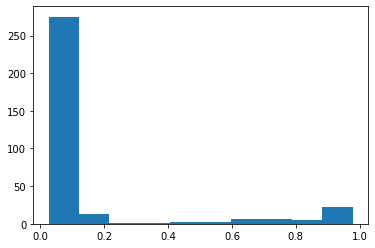

In [ ]:
plt.hist(predictions)
plt.show()

The continuous valued predictions from the model tend to skew toward 0 or 1, but there is sufficient mass between 0.1 and 0.9. Adjusting the cutoff should shift a number of customer predictions.  

Compare the original confusion matrix with a cutoff of 0.5 to one with a cutoff of 0.3.

In [ ]:
display(pd.crosstab(index=test_data.iloc[:, 0], columns=np.round(
    predictions), rownames=['actual'], colnames=['predictions']))
display(pd.crosstab(index=test_data.iloc[:, 0], columns=np.where(
    predictions > 0.3, 1, 0), rownames=['actual'], colnames=['predictions']))

predictions,0.0,1.0
actual,,
0,282,4
1,10,38


predictions,0,1
actual,,
0,281,5
1,8,40


We can see that changing the cutoff from 0.5 to 0.3 results in two fewer true negatives, seven more true positives, two additional false positives, and seven fewer false negatives.  

The numbers may look small, but that's 5 percent of customers, overall, who are shifting because of a change to the cutoff.  

Was this the right decision?  

You may end up retaining seven more customers, but you also unnecessarily incentivized two more customers who would have stayed without those incentives.  

Determining optimal cutoffs is a key step in properly applying machine learning in a real-world setting.

#### Normalizing the output

Now, let's define a helper function that, in addition to computing the above confusion matrix, also "normalizes" it.  

Instead of showing the absolute counts, you can now see percentages.

In [ ]:
def confusion_matrix(test_data, predictions, cutoff):
    conf_matrix = pd.crosstab(index=np.append(test_data.iloc[:, 0], [0,1]), columns=np.append(np.where(
        predictions > cutoff, 1, 0), [0,1]), rownames=['actual'], colnames=['predictions'])
    conf_matrix.iat[0,0]-=1
    conf_matrix.iat[1,1]-=1
    conf_matrix_normalized = conf_matrix/conf_matrix.values.sum()
    return conf_matrix_normalized

confusion_matrix(test_data, predictions, 0.5)

predictions,0,1
actual,,
0,0.844311,0.011976
1,0.029940,0.113772


#### Taking relative cost of errors into account

Any practical binary classification problem is likely to produce a similarly sensitive cutoff. That by itself isn’t a problem. After all, if the scores for two classes are really easy to separate, the problem probably isn’t very hard to begin with. You might even be able to solve it with simple rules instead of ML.

More important, if you put an ML model into production, *you will have to pay for false postiives and false negatives.*

Consider similar costs associated with correct predictions of true positives and true negatives.  The choice of the cutoff affects all four of these statistics. Be mindful of the relative costs to the business for each of these four outcomes per prediction.

#### Assigning costs

The costs for a mobile phone service provider's churn depend on the specific action that the business takes.

Let's make some assumptions here.

First, assign the true negatives the cost of \$0. Your model essentially correctly identified a happy customer in this case, and you don’t need to do anything.

False negatives are the most problematic, because they incorrectly predict that a churning customer will stay. You lose the customer and will have to pay all the costs of acquiring a replacement customer. 

These costs include:

* Foregone revenue
* Advertising costs
* Administrative costs
* Point of sale costs
* Phone hardware subsidies

A quick search on the Internet reveals that such costs typically run in the hundreds of dollars.  So, for the purposes of this example, let's assume \$500. This is the cost of false negatives.

Finally, for customers that your model identifies as churning, let's assume a retention incentive in the amount of 
\\$100. If my provider offered me such a concession, I’d certainly think twice before leaving. This is the cost of both true positive and false positive outcomes. 

In the case of false positives (the customer is happy, but the model mistakenly predicted churn), we will “waste” the \\$100 concession. We probably could have spent that \\$100 more effectively, but it's possible that we increased the loyalty of an already loyal customer, so that’s not so bad.

#### Finding the optimal cutoff

It’s clear that false negatives are substantially more costly than false positives. Instead of optimizing for error based on the number of customers, we should be minimizing a cost function that looks like this:

```txt
$500 * FN(C) + $0 * TN(C) + $100 * FP(C) + $100 * TP(C)
```

FN(C) means that the false negative percentage is a function of the cutoff, C, and similar for TN, FP, and TP.  You need to find the cutoff, C, where the result of the expression is smallest.

A straightforward way to do this, is to simply run a simulation over a large number of possible cutoffs.  

Below, we test 100 possible values in the for loop.

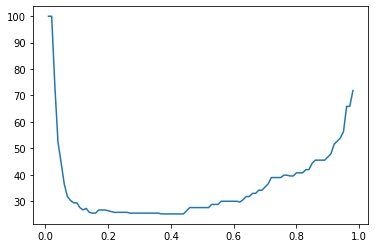

Cost is minimized near a cutoff of: 0.37 for a cost of: 25.149700598802397


In [ ]:
COST_OF_ERRORS = np.array([[0, 100], [500, 100]])

cutoffs = np.arange(0.01, .99, 0.01)
costs = []
for c in cutoffs:
    cost = (COST_OF_ERRORS * confusion_matrix(test_data,
                                              predictions, c)).values.sum()
    costs.append(cost)

costs = np.array(costs)
plt.plot(cutoffs, costs)
plt.show()
print('Cost is minimized near a cutoff of:',
      cutoffs[np.argmin(costs)], 'for a cost of:', np.min(costs))

The above chart shows that when you set a threshold that's too low, your costs skyrocket because all customers are given a retention incentive.

Meanwhile, setting the threshold too high results in too many lost customers, which is, ultimately, nearly as costly.

The overall cost can be minimized to \$24.55 by setting the cutoff to 0.29.

How does this compare not using an ML model at all?  That is, not giving any incentives and losing all customers that would churn.

Assume that the corresponding confusion matrix looks like this:

In [ ]:
no_ml_confusion_matrix = np.array([[0.855086, 0], [1-0.855086, 0]])

display((COST_OF_ERRORS * no_ml_confusion_matrix).sum())

72.457

The cost per customer of not using the ML model and while maintaining the same pool of customers is substatially higher: $\$$72.46 versus $\$$24.55


## Extensions

This notebook showed you how to build a model that predicts whether a customer is likely to churn, and then how to optimally set a threshold that accounts for the cost of true positives, false positives, and false negatives.  

There are several ways to extend it including:

* Some customers who receive retention incentives will still churn.  Including a probability of churning despite receiving an incentive in your cost function would provide a better ROI on our retention programs.
* Customers who switch to a lower-priced plan or who deactivate a paid feature represent different kinds of churn that could be modeled separately.
* Modeling the evolution of customer behavior. If usage is dropping and the number of calls placed to Customer Service is increasing, you are more likely to experience churn then if the trend is the opposite. A customer profile should incorporate behavior trends.
* Actual training data and monetary cost assignments could be more complex.
* Multiple models for each type of churn could be needed.

Regardless of additional complexity, similar principles described in this notebook likely apply.

### Clean-up

If you're done with this notebook, please run the cell below to remove the hosted endpoint and avoid any charges from any stray instances being left on.

In [ ]:
sagemaker.Session().delete_endpoint(xgb_predictor.endpoint_name)